# Machine learning process

First import all necessary packages in order not to worry about them when testing new parameters/algorithms:

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

Before going further on with the first algorithm, let's retrieve the ground truth from a CSV file generated on the 13th of January 2020 at 2:25 PM. This ground truth gathers results from a thousand malwares collected on the 25th of June 2019.
The data are then splitted between the inputs and outputs as follow :

In [2]:
gt = pd.read_csv('../dumps/2020.01.13-14.25.csv')
cols = [col for col in gt.columns if col not in ['label']]
data = gt[cols]
target = gt['label']

Let's now create the training and test sets. Since the dataset is quite small,the *80/20* rule is applied for the size of the sets. The *random_state* variable is a seed used to add randomness in the set. Since the purpose of the experiment is to compare results, deterministic values should be favored at first. The value is then set to 0.

In [3]:
data_train, data_test, target_train, target_test = train_test_split(data,target, test_size = 0.20, random_state = 0)

## K-Nearest Neighbors

Principle : To make a prediction for a new data point, the algorithm finds the closest data points in the training dataset—its “nearest neighbors.”
Simplest version : take THE closest neighbor (*k=1*)
Advanced version : take the K-nearest neighbors, using a voting system where the majority wins (*k=K*)
Let's start with *k=1* and see how it goes :

In [4]:
neigh = KNeighborsClassifier(n_neighbors=1)
neigh.fit(data_train, target_train)
print("Test set accuracy: {:.2f}".format(neigh.score(data_test, target_test)))

Test set accuracy: 0.79


This model is 79% accurate, which makes sense knowing that the 1000 samples dataset contains a majority of "not packed" malwares.
Let's try with a few other values :

In [5]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(data_train, target_train)
print("Test set accuracy: {:.2f}".format(neigh.score(data_test, target_test)))

Test set accuracy: 0.80


In [6]:
neigh = KNeighborsClassifier(n_neighbors=6)
neigh.fit(data_train, target_train)
print("Test set accuracy: {:.2f}".format(neigh.score(data_test, target_test)))

Test set accuracy: 0.83


In [7]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(data_train, target_train)
print("Test set accuracy: {:.2f}".format(neigh.score(data_test, target_test)))

Test set accuracy: 0.82


It's interesting to notice that increasing the number of neighbors doesn't always give better results, as the performance with *k=9* is better than *k=3* but worst than *k=6*. This can be more easily visualized with the graph here below.

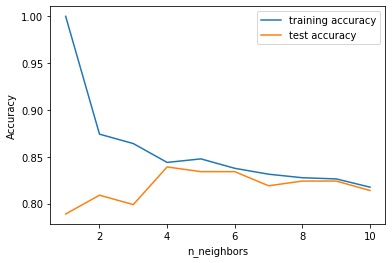

In [8]:
training_accuracy = [] 
test_accuracy = []
neighbors_settings = range(1, 11)
for n_neighbors in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(data_train, target_train)
    training_accuracy.append(clf.score(data_train, target_train))
    test_accuracy.append(clf.score(data_test, target_test))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

By looking at the figure, we can see that the best result obtained for the test set corresponds to a  value of *k=4*.
Before that, the model is probably overfitting.
Note that the overall accuracy is not really good. This can be explained because the K-NN algorithm does not perform well on datasets with a lot of features (and this dataset contains more than 100) and sparse datasets, which is also a caracteristic of the dataset used. Trying to preprocess the data might help to increase performance, although this algorithm is known to be really easy to understand and a good way to start experiment while being quite slow with many features.

## Linear models

Principle : Linear models make a prediction using a linear function of the input features. Each feature is assigned a weight learned by the algorithm.
There are many different linear models for classification. The difference between these models lies in how the model parameters w and b are learned from the training data, and how model complexity can be controlled. The two most common algorithms are *logistic regression* (despites its name) and *linear support vector machines*.
For both of them, the regularization parameter C can be adjusted to get better results. The higher the value, the most the algorithm is gonna give importance to every points for the dataset trying to fit as most as possible to the training set. Using low values means the algorithm is gonna try to adjust to the "majority" of the points.

### Logistic regression

Let's try the logistic regression first with C set to the default value 1.

In [10]:
logreg = LogisticRegression().fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg.score(data_test, target_test)))

Training set score: 0.823
Test set score: 0.779


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [11]:
logreg100 = LogisticRegression(C=100).fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg100.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg100.score(data_test, target_test)))

Training set score: 0.821
Test set score: 0.784


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [13]:
logreg001 = LogisticRegression(C=0.01).fit(data_train, target_train)
print("Training set score: {:.3f}".format(logreg001.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(logreg001.score(data_test, target_test)))

Training set score: 0.821
Test set score: 0.774


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Intersting to notice that here to values are always quite similar. We should maybe try with more iterations as stated in the erros messages.
We can also add L1 regularization to limit the number of features and see how it goes.

## Linear SVC

In [17]:
linsvc = LinearSVC().fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc.score(data_test, target_test)))

Training set score: 0.732
Test set score: 0.653


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [18]:
linsvc100 = LinearSVC(C=100).fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc100.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc100.score(data_test, target_test)))

Training set score: 0.780
Test set score: 0.754


/usr/local/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
linsvc001 = LinearSVC(C=0.01).fit(data_train, target_train)
print("Training set score: {:.3f}".format(linsvc001.score(data_train, target_train))) 
print("Test set score: {:.3f}".format(linsvc001.score(data_test, target_test)))